In [4]:
import sys
import numpy as np
import matplotlib.pyplot as pl


In [5]:
def _binwidth_fd(arr):
    """
    Returns bin width for given sample as per Freedman-Diaconis' rule.


    As per this rule, bin width h is defined as:
                    h = 2 (IQR) NS ^ (-1/3)
    References
    ----------
    https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
    """
    n = float(len(arr))
    iqr = np.percentile(arr, 75.) - np.percentile(arr, 25.)
    return 2. * iqr * np.power(n, -1. / 3.)
    

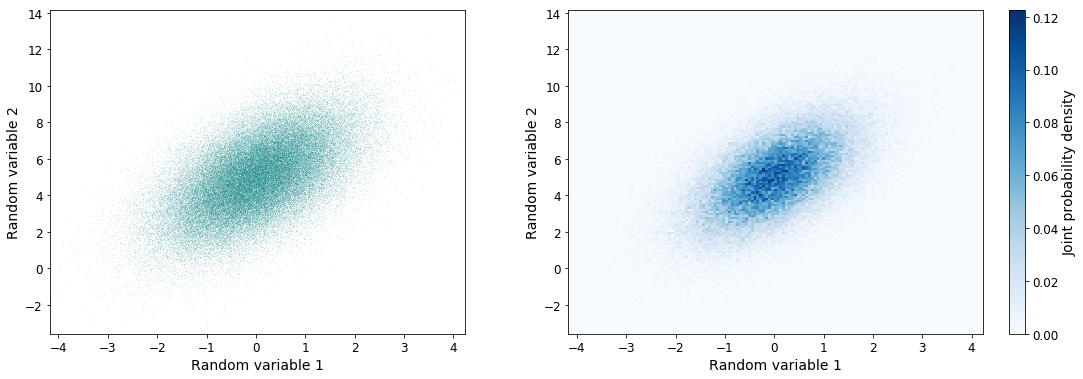

In [6]:
if __name__ == "__main__":
    ##  generate two random samples from a bivariate normal distribution with
    ##  given means, variances, and correlation
    ##  ---------------------------------------------------------------------
    NS = 100000                     # sample size
    mu1, mu2 = 0., 5.
    sd1, sd2 = 1., 2.
    #corr = float(sys.argv[1])       # take correlation from script argument
    corr = 0.8
    cov = np.array([[sd1 ** 2, corr * np.sqrt(sd1 * sd2)],
                    [corr * np.sqrt(sd1 * sd2), sd2 ** 2]])
    sample = np.random.multivariate_normal(mean=[mu1, mu2], cov=cov, size=NS)
    s1, s2 = sample[:, 0], sample[:, 1]

    ## use numpy.histogram2d to get joint distributions
    ## ------------------------------------------------
    # bin widths
    h1 = _binwidth_fd(s1)
    h2 = _binwidth_fd(s2)
    # range of values
    m1, M1 = s1.min(), s1.max()
    m2, M2 = s2.min(), s2.max()
    # number of bins
    nb1 = (M1 - m1) / h1
    nb2 = (M2 - m2) / h2
    # histogram
    H, be1, be2 = np.histogram2d(x=s1, y=s2, bins=[nb1, nb2], normed=True)
    # bin centers
    bc1 = 0.5 * (be1[1:] + be1[:-1])
    bc2 = 0.5 * (be2[1:] + be2[:-1])

    ## plot the results
    # set up figure and axes
    fig = pl.figure(figsize=[18., 6.])      # 18 in x 6 in figure
    ax1 = fig.add_axes([0.10, 0.15, 0.32, 0.75])
    ax2 = fig.add_axes([0.50, 0.15, 0.40, 0.75])
    axlabfs = 14                            # axis label font size
    tiklabfs = 12                           # axis tick labels size
    # plot a scatter plot in axes ax1
    ax1.plot(s1, s2, ".", mfc="Teal", mec="none", alpha=0.25, ms=1.)
    # plot the 2D joint density stored in H as pcolormesh in axes ax2
    xx, yy = np.meshgrid(bc1, bc2)
    im2 = ax2.pcolormesh(xx, yy, H.T, cmap=pl.cm.Blues)
    cb2 = pl.colorbar(im2)

    ## prettify axes
    ## -------------
    # ensure that the scatter plot axis limits is the same as the pcolormesh
    ax1.set_xlim(ax2.get_xlim())
    ax1.set_ylim(ax2.get_ylim())
    # axis labels
    for ax in [ax1, ax2]:
         ax.set_xlabel("Random variable 1", fontsize=axlabfs)
         ax.set_ylabel("Random variable 2", fontsize=axlabfs)
    # tick labels
    for ax in fig.axes:
        ax.tick_params(labelsize=tiklabfs)
    cb2.set_label("Joint probability density", fontsize=axlabfs)

    pl.savefig('joint_dist.png', format='png', dpi=1000)
    ## save figure
#    FT = "PNG"
#    FN = __file__[:-2] + FT.lower()
#    fig.savefig(FN, dpi=100)
#    print("figure saved to: %s" % FN)

In [7]:
s2.shape

(100000,)

In [8]:
sample.shape

(100000, 2)

In [9]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plv_hist = np.genfromtxt ('plv_hist.csv', delimiter=",")
plv_pi = np.genfromtxt ('plv_pi.csv', delimiter=",")
volc_sigl = -1*np.genfromtxt ('sigl.txt', delimiter=",")
volc_source_sigl = np.genfromtxt ('volc_source_850_1849.csv', delimiter=",")
# data source https://media.nature.com/original/nature-assets/nature/journal/v523/n7562/extref/nature14565-s6.xlsx
# from the paper https://www.nature.com/articles/nature14565
# Other data for phase coherence taken from PMIP3 simulations of IPSL model

# The PI control experiment data is from 850-1849 and the historical last millenium 
# run is from 850-1850, hence there is one year extra in the historical run. So we need to 
# take only upto 1849 to have complete 1000 years. Further the phase locking values are 
# calculated as from 3 year moving windows. So, the first value represents July 1851 and the 
# last value represents June 1848, Hence there are 11964 months. From the yearly volcanic 
# data a monthly dataset is created in which the first six months have the values of 
# volcanic year 1851 and the last six months have the values of the year 1848
# sigl.txt also has data from 850-1850 hence the last year is discarded
#
# Making monthly dataset for volcanic forcing corresponding to the phase locking values
# 0:1000 is the index of volc_sigl in python, hence 1000 corresponds to 1850
# 999 corresponds to 1849 and 998 corresponds to 1848, since the phase coherence analysis
# has been done for a period of 1000 years and a 3 year moving window is used for calculating 
# plv values, the plv time series will have a size 997*12

volc_data = volc_sigl[1:998]

# in volc_source_sigl indices 0 and 999 represent 850 and 1849, 0:999 will give 0:998 
# in reality, 1 represents 851 and 998 represents 1848
volc_source_data = volc_source_sigl[1:999]

volc_data_mon = np.zeros((997*12))
volc_source_data_mon = np.zeros((997*12))

volc_data_mon[0:6] = volc_data[0]
volc_source_data_mon[0:6] = volc_source_data[0]

volc_data_mon[11958:11964] = volc_data[-1]
volc_source_data_mon[11958:11964] = volc_source_data[-1]

for yyyy in range(996):
    volc_data_mon[6+yyyy*12:18+yyyy*12] = volc_data[1+yyyy]
    volc_source_data_mon[6+yyyy*12:18+yyyy*12] = volc_source_data[1+yyyy]
print(volc_source_data[0:10])
print(volc_source_data_mon[0:120])

# Creating a 2D array plv whose first column will contain plv for PI and the second column 
# will contain the plv for historical

plv = np.zeros((plv_pi.shape[0], 2))
plv[:,0] = plv_pi[:]
plv[:,1] = plv_hist[0:11964]

thres = 0.95

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


22.8731
[15. 19. 22. ... 20. 23. 18.]


/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


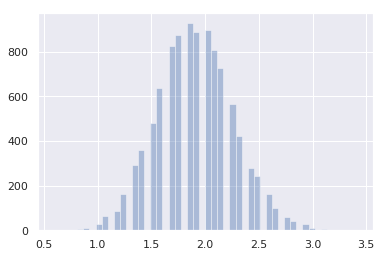

In [10]:
# 10 year PI control not considering first 200 years
import random
Nsample = plv[1200:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))
dummy_log_sum = 0
plv_pi_monte_carlo = np.zeros((Nsample))
plv_pi_monte_carlo[0:Nsample] = plv[1200:,0]
dummy_pi_scatter = np.zeros((N))

for niter in range(N):
    dummy = plv_pi_monte_carlo[random.sample(range(0, 8399), 120)]
    dummy_log[dummy<thres] = 0
    dummy_log[dummy>thres] = 1
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    dummy_pi_scatter[niter] = np.sum(dummy_log)
print(dummy_log_sum/N)
print(dummy_pi_scatter)
sns.distplot(dummy_pi_scatter/12, kde=False)
#plt.savefig('plv_pi_pdf.eps', format='eps', dpi=1000)

20.8028
9.110000000000001


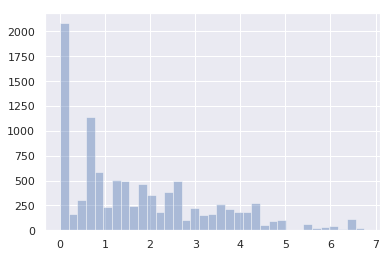

In [11]:
# 10 year historical only volcanic PLV volc thres = 10 for tropical eruptions
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((120))

dummy_log_sum = 0
plv_hist_monte_carlo = np.zeros((Nsample))
plv_hist_monte_carlo = plv[:,1]
niter = 0
dummy_hist_scatter = np.zeros((N))
while niter < N:
    rand_year = random.sample(range(10, 11830), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]:rand_year[0]+120]
    dummy_1 = dummy
    if volc_data_mon[rand_year[0]] < 0.1:
        continue
# 1 for tropical, 2 for NH, 3 for SH
    if volc_source_data_mon[rand_year[0]] > 1.1:
        continue
    dummy_hist_scatter[niter] = np.sum(dummy_log)
    niter = niter + 1
    dummy_log[dummy_1<thres] = 0
    dummy_log[dummy_1>thres] = 1
    #print(niter)
    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    
print(dummy_log_sum/N)
print(np.sum(volc_data[800:850])-10.24)
#print(volc_data[800:850]) # include later
#print(dummy_hist_scatter_1650_1700[1100:1200])
#1650-1700
sns.distplot(dummy_hist_scatter[:]/12, kde=False)
plt.savefig('plv_hist_tropical_pdf.eps', format='eps', dpi=1000)

120


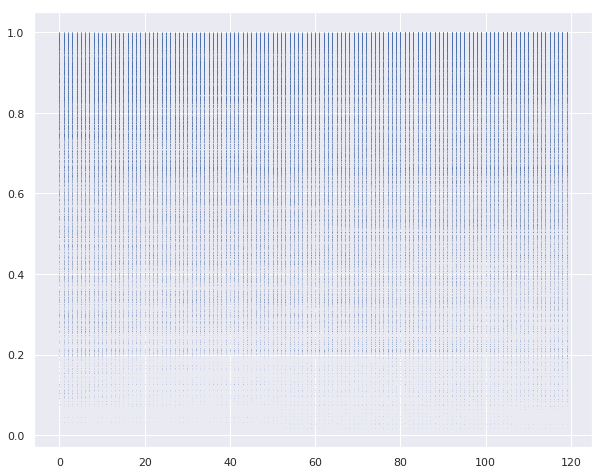

In [12]:
# 10 year historical only volcanic PLV volc thres = 10 for tropical eruptions
import random
import warnings
warnings.filterwarnings('ignore')
Nsample = plv[:,1].shape[0]
N=10000
thres = 0.95
dummy_log = np.zeros((N,120))

dummy_log_sum = 0
plv_hist_monte_carlo = np.zeros((Nsample))
plv_hist_monte_carlo = plv[:,1]
niter = 0
dummy_hist_scatter = np.zeros((N))
while niter < N:
    rand_year = random.sample(range(10, 11830), 1)
    #print(rand_year[0])
    dummy = plv_pi_monte_carlo[rand_year[0]:rand_year[0]+120]
    dummy_1 = dummy
    if np.max(volc_data_mon[rand_year[0]:rand_year[0]+120]) < 0.1:
        continue
# 1 for tropical, 2 for NH, 3 for SH
    if np.max(volc_source_data_mon[rand_year[0]:rand_year[0]+120]) > 1.1:
        continue
    if dummy_1.shape[0] !=120:
        continue
    #print(dummy_1.shape)
    dummy_log[niter,:] = dummy_1[:]
#    dummy_hist_scatter[niter] = np.sum(dummy_log)
    niter = niter + 1
#    dummy_log[dummy_1<thres] = 0
#    dummy_log[dummy_1>thres] = 1
    #print(niter)
#    dummy_log_sum = dummy_log_sum + np.sum(dummy_log)
    
#print(dummy_log_sum/N)
#print(np.sum(volc_data[800:850])-10.24)
#print(volc_data[800:850]) # include later
#print(dummy_hist_scatter_1650_1700[1100:1200])
#1650-1700
#sns.distplot(dummy_hist_scatter[:]/12, kde=False)
x=np.arange(0,120)
dummy_log.shape
print(x.shape[0])
plt.figure(figsize=(10,8))

for i in range(N):
    plt.scatter(x, dummy_log[i,:], s=0.001, c='b', alpha=0.3)

In [13]:
plv_random = []
months_random = []
for i in range(N):
    for j in range(120):
        if dummy_log[i,j]>0.95:
            plv_random.append(dummy_log[i,j])
            months_random.append(j)

In [14]:
np.asarray(plv_random).shape

(223825,)

In [15]:
np.asarray(months_random).shape

(223825,)

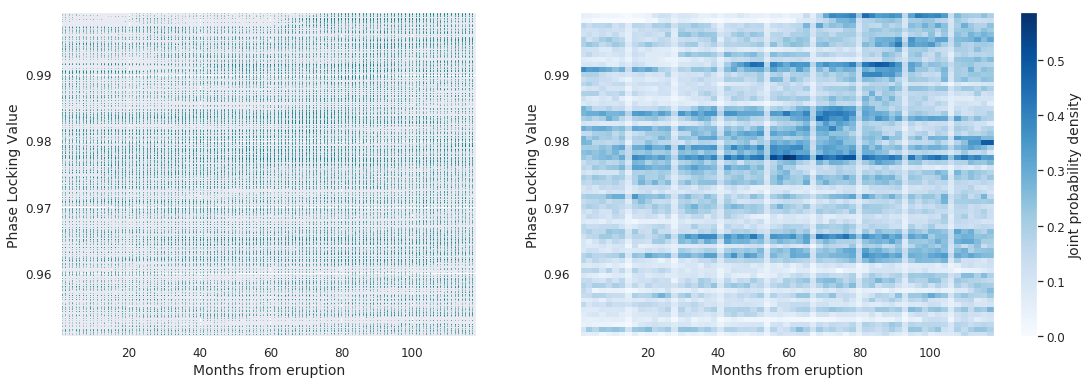

In [16]:
s1, s2 = np.asarray(months_random) , np.asarray(plv_random)

## use numpy.histogram2d to get joint distributions
## ------------------------------------------------
# bin widths
h1 = _binwidth_fd(s1)
h2 = _binwidth_fd(s2)
# range of values
m1, M1 = s1.min(), s1.max()
m2, M2 = s2.min(), s2.max()
# number of bins
nb1 = (M1 - m1) / h1
nb2 = (M2 - m2) / h2
# histogram
H, be1, be2 = np.histogram2d(x=s1, y=s2, bins=[nb1, nb2], normed=True)
# bin centers
bc1 = 0.5 * (be1[1:] + be1[:-1])
bc2 = 0.5 * (be2[1:] + be2[:-1])

## plot the results
# set up figure and axes
fig = pl.figure(figsize=[18., 6.])      # 18 in x 6 in figure
ax1 = fig.add_axes([0.10, 0.15, 0.32, 0.75])
ax2 = fig.add_axes([0.50, 0.15, 0.40, 0.75])
axlabfs = 14                            # axis label font size
tiklabfs = 12                           # axis tick labels size
# plot a scatter plot in axes ax1
ax1.plot(s1, s2, ".", mfc="Teal", mec="none", alpha=0.25, ms=1.)
# plot the 2D joint density stored in H as pcolormesh in axes ax2
xx, yy = np.meshgrid(bc1, bc2)
im2 = ax2.pcolormesh(xx, yy, H.T, cmap=pl.cm.Blues, rasterized=True)
cb2 = pl.colorbar(im2)

## prettify axes
## -------------
# ensure that the scatter plot axis limits is the same as the pcolormesh
ax1.set_xlim(ax2.get_xlim())
ax1.set_ylim(ax2.get_ylim())
# axis labels
for ax in [ax1, ax2]:
    ax.set_xlabel("Months from eruption", fontsize=axlabfs)
    ax.set_ylabel("Phase Locking Value", fontsize=axlabfs)
# tick labels
for ax in fig.axes:
    ax.tick_params(labelsize=tiklabfs)
cb2.set_label("Joint probability density", fontsize=axlabfs)
pl.savefig('joint_dist_historical.png', format='png', dpi=1000)

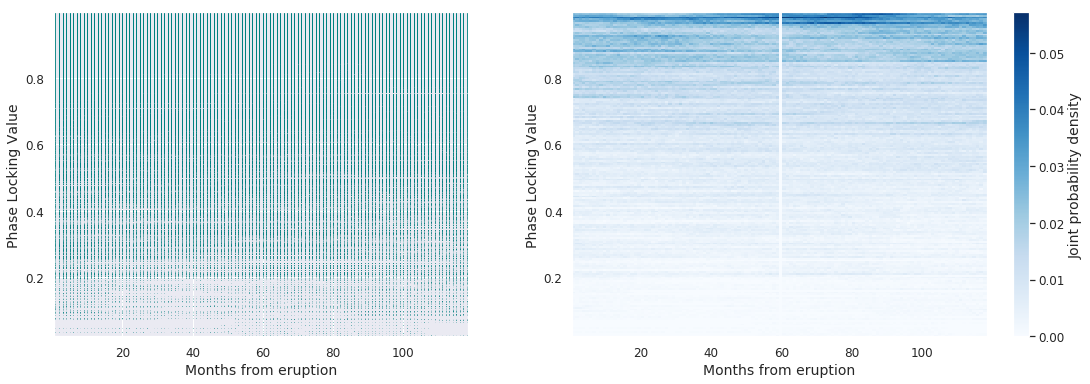

In [24]:
# 1) Instead of the the min and max commands used in the script to define 
#    the range of the bins, could you simply specify the PLV range as 0 to 1.
# 2) Also, instead of using the Freedman-Diaconis rule for the time
#    variable, could you specify the number of bins as the number of months,
#    i.e., 121 (including month zero). I think then the vertical white
#    stripes should be gone.
# 3) To have files of small size, you could specify the rasterized=True
#    option in the pcolormesh and the scatter plot lines.
plv_random = []
months_random = []
for i in range(N):
    for j in range(120):
        plv_random.append(dummy_log[i,j])
        months_random.append(j)


s1, s2 = np.asarray(months_random) , np.asarray(plv_random)

## use numpy.histogram2d to get joint distributions
## ------------------------------------------------
# bin widths
h1 = _binwidth_fd(s1)
h2 = _binwidth_fd(s2)
# range of values
m1, M1 = s1.min(), s1.max()
m2, M2 = s2.min(), s2.max()
# number of bins
nb1 = (M1 - m1) / h1
nb2 = (M2 - m2) / h2
nb1 = 121
nb2 = 173
# histogram
H, be1, be2 = np.histogram2d(x=s1, y=s2, bins=[nb1, nb2], normed=True)
# bin centers
bc1 = 0.5 * (be1[1:] + be1[:-1])
bc2 = 0.5 * (be2[1:] + be2[:-1])

## plot the results
# set up figure and axes
fig = pl.figure(figsize=[18., 6.])      # 18 in x 6 in figure
ax1 = fig.add_axes([0.10, 0.15, 0.32, 0.75])
ax2 = fig.add_axes([0.50, 0.15, 0.40, 0.75])
axlabfs = 14                            # axis label font size
tiklabfs = 12                           # axis tick labels size
# plot a scatter plot in axes ax1
ax1.plot(s1, s2, ".", mfc="Teal", mec="none", alpha=0.25, ms=1.)
# plot the 2D joint density stored in H as pcolormesh in axes ax2
xx, yy = np.meshgrid(bc1, bc2)
im2 = ax2.pcolormesh(xx, yy, H.T, cmap=pl.cm.Blues, rasterized=True)
cb2 = pl.colorbar(im2)

## prettify axes
## -------------
# ensure that the scatter plot axis limits is the same as the pcolormesh
ax1.set_xlim(ax2.get_xlim())
ax1.set_ylim(ax2.get_ylim())
# axis labels
for ax in [ax1, ax2]:
    ax.set_xlabel("Months from eruption", fontsize=axlabfs)
    ax.set_ylabel("Phase Locking Value", fontsize=axlabfs)
# tick labels
for ax in fig.axes:
    ax.tick_params(labelsize=tiklabfs)
cb2.set_label("Joint probability density", fontsize=axlabfs)
pl.savefig('joint_dist_historical.png', format='png', dpi=1000)

In [23]:
nb2

172.79255789090573

/iitm2/cccr-res/msingh/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide


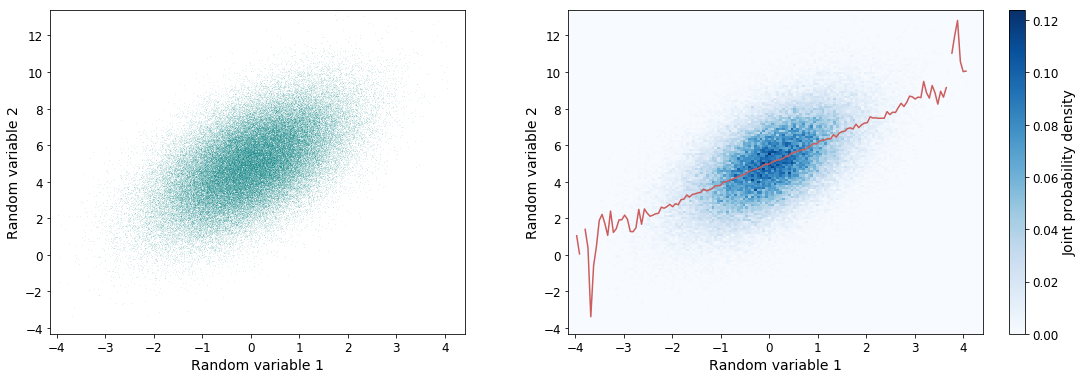

In [2]:
#Dear Manmeet,

#Can you please try to plot the expected value E[PLV|t]? This is easily
#estimated from the marginal distributions P(PLV|t). I have added a few
#lines to the joint distribution code I had sent you earlier (lines 63-70
#of attached file).

#Also, maybe we could do a quick Skype chat tomorrow i.e. Friday Feb 1 -
#sometime around 12 PM Germany i.e. roughly around 4.30 PM IST. Will this
#work for you?

#Best,

#Bedartha


import sys
import numpy as np
import matplotlib.pyplot as pl


def _binwidth_fd(arr):
    """
    Returns bin width for given sample as per Freedman-Diaconis' rule.


    As per this rule, bin width h is defined as:
                    h = 2 (IQR) NS ^ (-1/3)
    References
    ----------
    https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
    """
    n = float(len(arr))
    iqr = np.percentile(arr, 75.) - np.percentile(arr, 25.)
    return 2. * iqr * np.power(n, -1. / 3.)


if __name__ == "__main__":
    ##  generate two random samples from a bivariate normal distribution with
    ##  given means, variances, and correlation
    ##  ---------------------------------------------------------------------
    NS = 100000                     # sample size
    mu1, mu2 = 0., 5.
    sd1, sd2 = 1., 2.
    #corr = float(sys.argv[1])       # take correlation from script argument
    corr = 0.8
    cov = np.array([[sd1 ** 2, corr * np.sqrt(sd1 * sd2)],
                    [corr * np.sqrt(sd1 * sd2), sd2 ** 2]])
    sample = np.random.multivariate_normal(mean=[mu1, mu2], cov=cov, size=NS)
    s1, s2 = sample[:, 0], sample[:, 1]

    ## use numpy.histogram2d to get joint distributions
    ## ------------------------------------------------
    # bin widths
    h1 = _binwidth_fd(s1)
    h2 = _binwidth_fd(s2)
    # range of values
    m1, M1 = s1.min(), s1.max()
    m2, M2 = s2.min(), s2.max()
    # number of bins
    nb1 = (M1 - m1) / h1
    nb2 = (M2 - m2) / h2
    # histogram
    H, be1, be2 = np.histogram2d(x=s1, y=s2, bins=[nb1, nb2], normed=True)
    # bin centers
    bc1 = 0.5 * (be1[1:] + be1[:-1])
    bc2 = 0.5 * (be2[1:] + be2[:-1])

    ## estimate expected of marginal distribution E[x1|x2]
    ## ---------------------------------------------------
    rsw2 = 0.5 * (be2[1:] - be2[:-1])
    num = bc2.reshape(H.shape[1], 1) * rsw2.reshape(H.shape[1], 1) * H.T
    num = num.T.sum(axis=1)
    den = rsw2.reshape(H.shape[1], 1) * H.T
    den = den.T.sum(axis=1)
    E_1giv2 = num / den

    ## plot the results
    # set up figure and axes
    fig = pl.figure(figsize=[18., 6.])      # 18 in x 6 in figure
    ax1 = fig.add_axes([0.10, 0.15, 0.32, 0.75])
    ax2 = fig.add_axes([0.50, 0.15, 0.40, 0.75])
    axlabfs = 14                            # axis label font size
    tiklabfs = 12                           # axis tick labels size
    # plot a scatter plot in axes ax1
    ax1.plot(s1, s2, ".", mfc="Teal", mec="none", alpha=0.25, ms=1.)
    # plot the 2D joint density stored in H as pcolormesh in axes ax2
    xx, yy = np.meshgrid(bc1, bc2)
    im2 = ax2.pcolormesh(xx, yy, H.T, cmap=pl.cm.Blues)
    cb2 = pl.colorbar(im2)
    ax2.plot(bc1, E_1giv2, "-", c="IndianRed", lw=1.5)

    ## prettify axes
    ## -------------
    # ensure that the scatter plot axis limits is the same as the pcolormesh
    ax1.set_xlim(ax2.get_xlim())
    ax1.set_ylim(ax2.get_ylim())
    # axis labels
    for ax in [ax1, ax2]:
         ax.set_xlabel("Random variable 1", fontsize=axlabfs)
         ax.set_ylabel("Random variable 2", fontsize=axlabfs)
    # tick labels
    for ax in fig.axes:
        ax.tick_params(labelsize=tiklabfs)
    cb2.set_label("Joint probability density", fontsize=axlabfs)

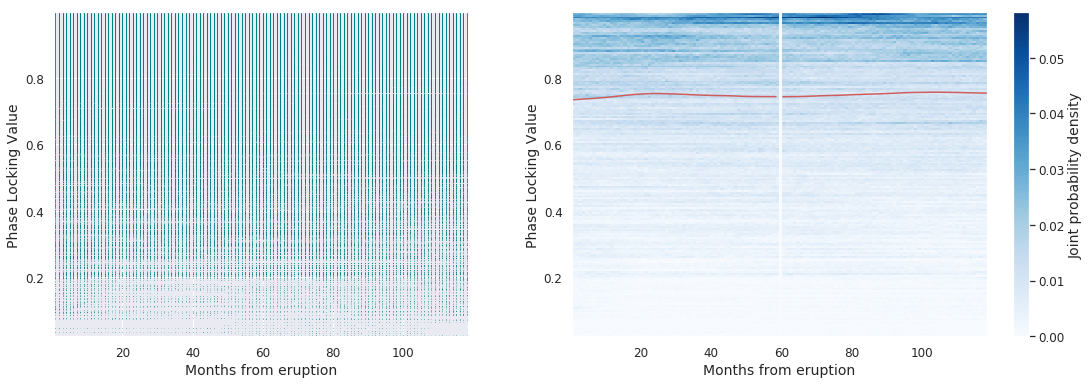

In [20]:
plv_random = []
months_random = []
for i in range(N):
    for j in range(120):
        plv_random.append(dummy_log[i,j])
        months_random.append(j)


s1, s2 = np.asarray(months_random) , np.asarray(plv_random)
## use numpy.histogram2d to get joint distributions
## ------------------------------------------------
# bin widths
h1 = _binwidth_fd(s1)
h2 = _binwidth_fd(s2)
# range of values
m1, M1 = s1.min(), s1.max()
m2, M2 = s2.min(), s2.max()
# number of bins
nb1 = (M1 - m1) / h1
nb2 = (M2 - m2) / h2
nb1 = 121
nb2 = 173
# histogram
H, be1, be2 = np.histogram2d(x=s1, y=s2, bins=[nb1, nb2], normed=True)
# bin centers
bc1 = 0.5 * (be1[1:] + be1[:-1])
bc2 = 0.5 * (be2[1:] + be2[:-1])

## estimate expected of marginal distribution E[x1|x2]
## ---------------------------------------------------
rsw2 = 0.5 * (be2[1:] - be2[:-1])
num = bc2.reshape(H.shape[1], 1) * rsw2.reshape(H.shape[1], 1) * H.T
num = num.T.sum(axis=1)
den = rsw2.reshape(H.shape[1], 1) * H.T
den = den.T.sum(axis=1)
E_1giv2 = num / den

## plot the results
# set up figure and axes
fig = pl.figure(figsize=[18., 6.])      # 18 in x 6 in figure
ax1 = fig.add_axes([0.10, 0.15, 0.32, 0.75])
ax2 = fig.add_axes([0.50, 0.15, 0.40, 0.75])
axlabfs = 14                            # axis label font size
tiklabfs = 12                           # axis tick labels size
# plot a scatter plot in axes ax1
ax1.plot(s1, s2, ".", mfc="Teal", mec="none", alpha=0.25, ms=1.)
# plot the 2D joint density stored in H as pcolormesh in axes ax2
xx, yy = np.meshgrid(bc1, bc2)
im2 = ax2.pcolormesh(xx, yy, H.T, cmap=pl.cm.Blues)
cb2 = pl.colorbar(im2)
ax2.plot(bc1, E_1giv2, "-", c="IndianRed", lw=1.5)

## prettify axes
## -------------
# ensure that the scatter plot axis limits is the same as the pcolormesh
ax1.set_xlim(ax2.get_xlim())
ax1.set_ylim(ax2.get_ylim())
# axis labels
for ax in [ax1, ax2]:
    ax.set_xlabel("Months from eruption", fontsize=axlabfs)
    ax.set_ylabel("Phase Locking Value", fontsize=axlabfs)
# tick labels
for ax in fig.axes:
    ax.tick_params(labelsize=tiklabfs)
cb2.set_label("Joint probability density", fontsize=axlabfs)
pl.savefig('joint_dist_historical.png', format='png', dpi=1000)

In [18]:
nb2

172.86482402504433